<a href="https://colab.research.google.com/github/EricHidekiMiyahara/clusterizacaoClientesKmeans/blob/main/ClusterizacaoClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

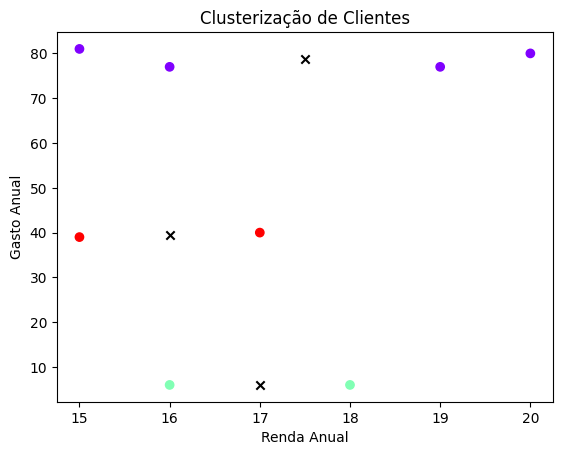

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Exemplo de dados de clientes
X = np.array([[15, 39], [15, 81], [16, 6], [16, 77], [17, 40], [18, 6], [19, 77], [20, 80]])

# Inicializando o algoritmo com 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Obtendo os centróides e os rótulos dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizando os clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black')
plt.xlabel('Renda Anual')
plt.ylabel('Gasto Anual')
plt.title('Clusterização de Clientes')
plt.show()

Segundo exemplo com uma base de dados maior:

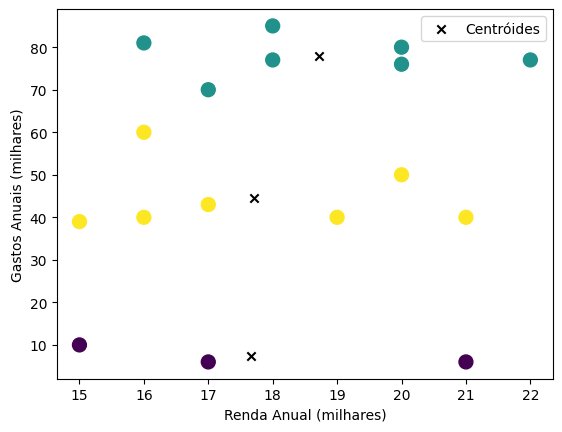

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios de clientes
X = np.array([[15, 39], [16, 81], [17, 6], [18, 77], [19, 40], [20, 76], [21, 6], [22, 77], [16, 40], [17,43], [20, 50], [21,40], [15, 10], [16, 60] , [17, 70], [18, 85], [20, 80]])

# Inicializando o modelo com K=3
kmeans = KMeans(n_clusters=3, init='random', random_state=42)

# Ajuste do modelo aos dados
kmeans.fit(X)

# Previsão dos clusters
y_kmeans = kmeans.predict(X)

# Visualização dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', label='Centróides')
plt.xlabel('Renda Anual (milhares)')
plt.ylabel('Gastos Anuais (milhares)')
plt.legend()
plt.show()